In [1]:
#For the data
import pandas as pd
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the data
stats1_df = pd.read_csv("./leagueoflegends/stats1.csv",sep=",")
stats2_df = pd.read_csv("./leagueoflegends/stats2.csv",sep=",")

/home/alex/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Concat the two datasets
stats_df = pd.concat([stats1_df,stats2_df])

In [4]:
stats_df.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [5]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834517 entries, 0 to 834517
Data columns (total 56 columns):
id                        int64
win                       int64
item1                     int64
item2                     int64
item3                     int64
item4                     int64
item5                     int64
item6                     int64
trinket                   int64
kills                     int64
deaths                    int64
assists                   int64
largestkillingspree       int64
largestmultikill          int64
killingsprees             int64
longesttimespentliving    int64
doublekills               int64
triplekills               int64
quadrakills               int64
pentakills                int64
legendarykills            int64
totdmgdealt               int64
magicdmgdealt             int64
physicaldmgdealt          int64
truedmgdealt              int64
largestcrit               int64
totdmgtochamp             int64
magicdmgtochamp         

In [6]:
#Dropping the useless columns
col_to_drop = ["item1","item2","item3","item4","item5","item6","timecc","wardsbought",'id']
stats_df.drop(columns=col_to_drop,inplace=True)

0    50.000027
1    49.999973
Name: win, dtype: float64


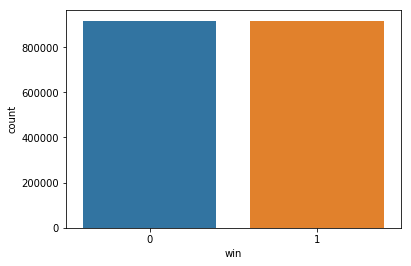

In [7]:
#The target that we want to predict is the column win
print(stats_df["win"].value_counts() / len(stats_df["win"]) * 100)
sns.countplot("win",data=stats_df)

0    90.074608
1     9.925392
Name: firstblood, dtype: float64


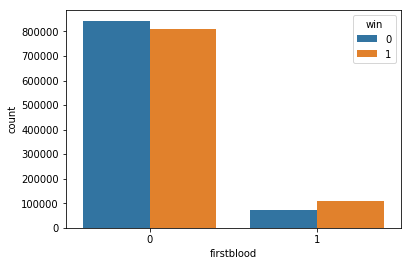

In [8]:
#Let's see if the firstblood can have an impact on the win rate
print(stats_df["firstblood"].value_counts() / len(stats_df["firstblood"]) * 100)
sns.countplot("firstblood",data=stats_df,hue="win")

In [9]:
#Importing the libraries for the LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn import metrics

/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
#Dropping the target column "win"
X = stats_df.drop(['win'],axis=1)
X.head(5)

,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,...,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood
0,3340,6,10,1,2,2,2,643,2,0,...,42,69,42,27,610,13,0,10,0,0
1,3364,0,2,12,0,0,0,1116,0,0,...,17,1,1,0,211,14,1,17,3,0
2,3340,7,8,5,5,2,1,584,2,0,...,205,3,1,2,182,14,1,13,5,0
3,3340,5,11,2,2,1,1,300,0,0,...,164,6,6,0,106,15,0,3,0,0
4,3340,2,8,2,0,1,0,504,0,0,...,235,4,3,1,159,15,0,10,0,0


In [11]:
#Keeping only the target column
Y = stats_df.win
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: win, dtype: int64

In [12]:
#From column to array in order to use it for the model
Y = np.ravel(Y)

In [ ]:
# Create LogisticRegression model
log_model = LogisticRegression(n_jobs=-1)

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

/home/alex/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1235: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [ ]:
#Great! or not. This mean we have 50% accuracy if the model would have guess only "lose" so this model is useless.
1-Y.mean()

In [ ]:
(log_model.coef_)

In [ ]:
coeff_df = pd.DataFrame(np.transpose(log_model.coef_),X.columns)

In [ ]:
coeff_df.reset_index(inplace=True,drop=False)

In [ ]:
coeff_df[0] = coeff_df[0].sort_values(ascending=False)

In [ ]:
#To show the coeff of the models
coeff_df

In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression(n_jobs=-1)

# Now fit the new model
log_model2.fit(X_train, Y_train)

In [ ]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print metrics.accuracy_score(Y_test,class_predict)